In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Put postgreSQL credeitials into sql_login.py
from sql_login import USERNAME as USERNAME
from sql_login import PASSWORD as PASSWORD

import matplotlib.pyplot as plt

In [2]:
avocado_df = pd.read_csv('Resources/avocado_fsda.csv')
avocado_df

,Unnamed: 0,Partner,Unnamed: 2,HS Code,Product,Year,UOM,Q1(Jan-Mar) Value,Q1(Jan-Mar) Qty,Q2(Apr-Jun) Value,Q2(Apr-Jun) Qty,Q3(Jul-Sep) Value,Q3(Jul-Sep) Qty,Q4(Oct-Dec) Value,Q4(Oct-Dec) Qty,Total Value,Total Qty,Reporter Code,Partner Code,Product Code
0,1,Mexico,1,804400040,AVOC-HSLIKE,2015-2015,MT,"415,297","201,920.40","351,040","168,041.20","363,268","192,710.00","351,592","224,355.70","1,481,197","787,027.20",US,MX,804400040
1,1,Mexico,1,804400040,AVOC-HSLIKE,2016-2016,MT,"368,268","248,406.90","337,046","169,535.30","503,892","156,340.00","487,017","183,535.50","1,696,223","757,817.70",US,MX,804400040
2,1,Mexico,1,804400040,AVOC-HSLIKE,2017-2017,MT,"547,791","218,137.40","543,618","171,088.60","604,793","142,779.70","507,040","203,342.00","2,203,242","735,347.60",US,MX,804400040
3,1,Mexico,1,804400040,AVOC-HSLIKE,2018-2018,MT,"548,622","250,125.20","517,619","221,488.00","452,591","165,683.20","434,364","221,708.90","1,953,196","859,005.30",US,MX,804400040
4,1,Mexico,1,804400040,AVOC-HSLIKE,2019-2019,MT,"545,016","298,071.40","690,601","187,819.50","560,915","186,423.90","535,124","259,503.00","2,331,656","931,817.80",US,MX,804400040
5,1,Mexico,2,804400020,ORG AVOC-HSLIKE,2015-2015,MT,"12,920","5,308.40","7,059","2,602.60","9,685","3,572.60","13,425","5,538.70","43,089","17,022.30",US,MX,804400020
6,1,Mexico,2,804400020,ORG AVOC-HSLIKE,2016-2016,MT,"11,019","5,162.60","8,789","4,350.50","20,657","6,575.60","31,393","11,061.30","71,858","27,150.00",US,MX,804400020
7,1,Mexico,2,804400020,ORG AVOC-HSLIKE,2017-2017,MT,"34,070","12,060.90","21,685","5,790.60","37,580","8,147.70","38,066","13,279.10","131,400","39,278.40",US,MX,804400020
8,1,Mexico,2,804400020,ORG AVOC-HSLIKE,2018-2018,MT,"34,302","13,515.00","26,308","9,830.00","27,515","8,576.20","30,441","13,188.10","118,565","45,109.30",US,MX,804400020
9,1,Mexico,2,804400020,ORG AVOC-HSLIKE,2019-2019,MT,"34,664","16,046.30","23,965","6,595.30","27,971","8,534.60","34,853","13,453.30","121,453","44,629.50",US,MX,804400020


In [3]:
def fas_csv_to_pd_df(file_name):
    input_df = pd.read_csv(file_name)
    out_df = pd.DataFrame(columns = ['Year','Quarter','Value','Qty'])
    year_list = []
    quarter_list=[]
    for k in range (0,3):
        for j in range(2015,2020):
            for i in range(1,5):
                quarter_list.append(i)
                year_list.append(j)

    out_df['Year'] = year_list
    out_df['Quarter'] = quarter_list

    value_list = []
    quantity_list = []
    for i in range(0,15):
        for j in range(7,15,2):   
            value_list.append(input_df.iloc[i,j].replace(',',''))
            quantity_list.append(input_df.iloc[i,j+1].replace(',',''))
    out_df['Value'] = value_list
    out_df['Qty'] = quantity_list
    out_df.columns = map(str.lower, out_df.columns)
    return out_df

In [4]:
avocado_df = fas_csv_to_pd_df('Resources/avocado_fsda.csv')
avocado_df['value'] = pd.to_numeric(avocado_df['value'])
avocado_df['qty'] = pd.to_numeric(avocado_df['qty'])

avocado_gb = avocado_df.groupby(['year','quarter']).sum().reset_index()
avocado_gb


,year,quarter,value,qty
0,2015,1,428238,207247.2
1,2015,2,358099,170643.8
2,2015,3,372958,196283.2
3,2015,4,365019,229894.5
4,2016,1,379309,253587.7
5,2016,2,345835,173885.8
6,2016,3,524672,162963.7
7,2016,4,518525,194638.4
8,2017,1,581869,230198.5
9,2017,2,565303,176879.2


In [5]:
rds_connection_string = USERNAME+':'+PASSWORD+"@localhost:5432/avocados"
engine = create_engine(f'postgresql://{rds_connection_string}')
conn = engine.engine.connect()

In [6]:
engine.table_names()

['avocada_fsda', 'lime_fsda']

In [7]:
avocado_gb[['year','quarter','value','qty']].to_sql(name='avocada_fsda', con=engine, if_exists='append', index=False)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "avocada_fsda_pkey"
DETAIL:  Key (quarter, year)=(1, 2015) already exists.

[SQL: INSERT INTO avocada_fsda (year, quarter, value, qty) VALUES (%(year)s, %(quarter)s, %(value)s, %(qty)s)]
[parameters: ({'year': 2015, 'quarter': 1, 'value': 428238, 'qty': 207247.19999999998}, {'year': 2015, 'quarter': 2, 'value': 358099, 'qty': 170643.80000000002}, {'year': 2015, 'quarter': 3, 'value': 372958, 'qty': 196283.2}, {'year': 2015, 'quarter': 4, 'value': 365019, 'qty': 229894.50000000003}, {'year': 2016, 'quarter': 1, 'value': 379309, 'qty': 253587.7}, {'year': 2016, 'quarter': 2, 'value': 345835, 'qty': 173885.8}, {'year': 2016, 'quarter': 3, 'value': 524672, 'qty': 162963.7}, {'year': 2016, 'quarter': 4, 'value': 518525, 'qty': 194638.4}  ... displaying 10 of 20 total bound parameter sets ...  {'year': 2019, 'quarter': 3, 'value': 588936, 'qty': 194976.9}, {'year': 2019, 'quarter': 4, 'value': 570064, 'qty': 273062.39999999997})]
(Background on this error at: http://sqlalche.me/e/gkpj)

avocado import price plot (by quarter)

In [8]:
plot_df_value = pd.pivot_table(avocado_gb, index ='year', columns ='quarter', values="value")
plot_df_value

quarter,1,2,3,4
year,,,,
2015,428238,358099,372958,365019
2016,379309,345835,524672,518525
2017,581869,565303,642373,545106
2018,583007,544024,480106,464805
2019,579759,714566,588936,570064


In [9]:
Q1=plot_df_value[1].tolist()
Q2=plot_df_value[2].tolist()
Q3=plot_df_value[3].tolist()
Q4=plot_df_value[4].tolist()

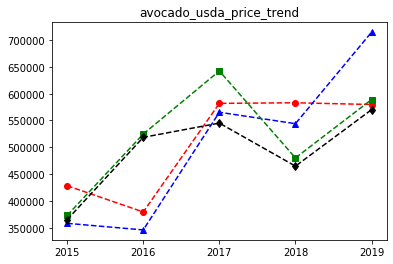

In [10]:
year=['2015','2016','2017','2018','2019']
plt.plot(year,Q1,color="red", label="Q1", marker="o",linestyle = "--" )
plt.plot(year,Q2,color="blue", label="Q2", marker="^",linestyle = "--" )
plt.plot(year,Q3,color="green", label="Q3", marker="s",linestyle = "--" )
plt.plot(year,Q4,color="black", label="Q4", marker="d",linestyle = "--" )

plt.title('avocado_usda_price_trend')
plt.savefig('Images/avocado_usda_price_trend.png')
plt.show()


avocado qty plot

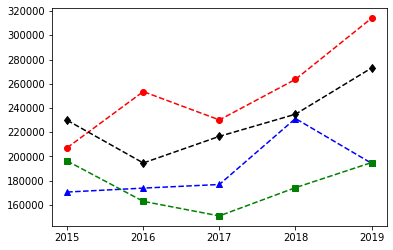

In [12]:
plot_df_qty = pd.pivot_table(avocado_gb, index ='year', columns ='quarter', values="qty")
plot_df_qty

Q1=plot_df_qty[1].tolist()
Q2=plot_df_qty[2].tolist()
Q3=plot_df_qty[3].tolist()
Q4=plot_df_qty[4].tolist()

year=['2015','2016','2017','2018','2019']
plt.plot(year,Q1,color="red", label="Q1", marker="o",linestyle = "--" )
plt.plot(year,Q2,color="blue", label="Q2", marker="^",linestyle = "--" )
plt.plot(year,Q3,color="green", label="Q3", marker="s",linestyle = "--" )
plt.plot(year,Q4,color="black", label="Q4", marker="d",linestyle = "--" )